## Handling Missing Value in Machine Learning

Youtube Link for the explanation : https://youtu.be/j5gCxdp0v2o

### Finding the missing values in Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [2]:
# Import the dataset
df_titanic = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_train.csv")

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_titanic.describe(include=['O'])  ## For categorical

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gallagher, Mr. Martin",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [5]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

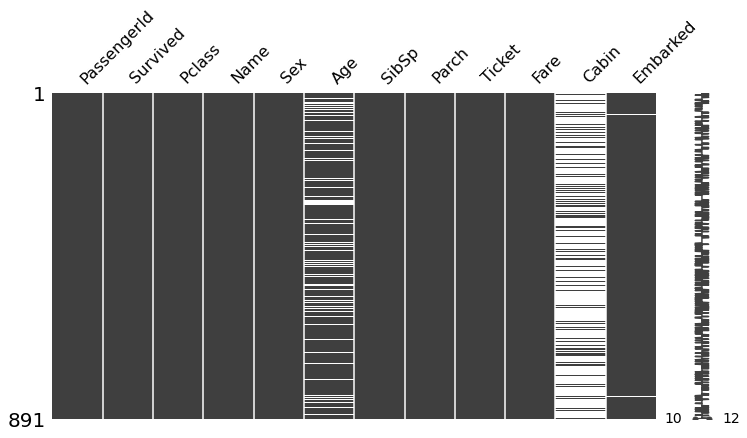

In [6]:
# Program to visualize missing values in dataset 
# Reference : https://github.com/ResidentMario/missingno
# Importing the libraries 
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df_titanic,figsize=(12,6)) 

<AxesSubplot:>

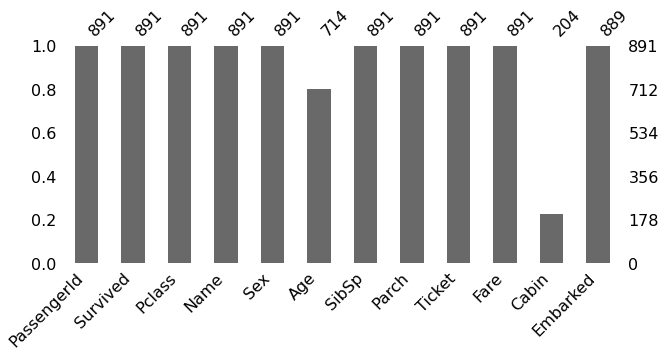

In [7]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df_titanic,figsize=(10,4)) 

<AxesSubplot:>

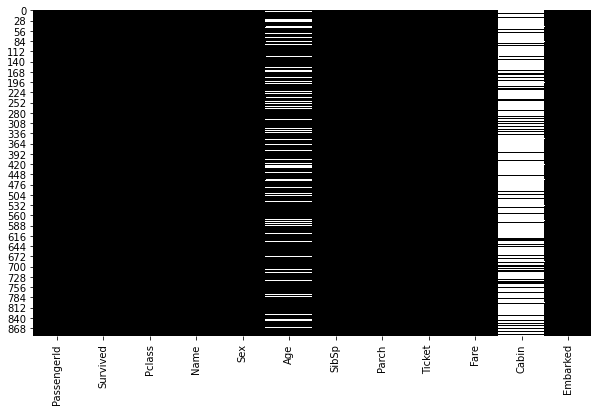

In [8]:
#sns.heatmap(df_titanic.isnull(),cmap="viridis")
plt.figure(figsize=(10,6))
sns.heatmap(
    data=df_titanic.isnull(),
    cmap=sns.color_palette(['black', 'yellow', 'orange', 'white']),cbar=False)

It is cleary visible that most of the null values are available in column AGE and CABIN

In [9]:
# lets find out the percentage of misssing vale in each column
Percent_Missing_Value = df_titanic.isnull().sum()*100/len(df_titanic)
Percent_Missing_Value

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Method 1- Removal or Deletion of missing value

####  List wise Deletion of Missing Value 
 - Use dropna(), drop() functions 

In [10]:
# Import the dataset
df_titanic = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_train.csv")

In [11]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
## Total no of samples where any column has NaN
df_titanic[(df_titanic["Age"].isnull()==True)|
           (df_titanic["Cabin"].isnull()==True)|
           (df_titanic["Embarked"].isnull()==True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
df_titanic.shape

(891, 12)

In [15]:
## Lets delete all the Rows where we have NaN values
df_titanic_new = df_titanic.dropna()

In [16]:
df_titanic_new.shape

(183, 12)

In [17]:
891-708

183

We have total 891 samples and 708 out of 891 have the NaN value.If we delete all the rows where we have NaN value then we can only get sample size 183, which is very less value to make the model so we cannot delete all the rows.

In [18]:
df_titanic_new[(df_titanic_new["Age"].isnull()==True)|
               (df_titanic_new["Cabin"].isnull()==True)|
               (df_titanic_new["Embarked"].isnull()==True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
df_titanic_new .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [20]:
df_titanic[(df_titanic["Age"].isnull()==True)&
               (df_titanic["Cabin"].isnull()==True)
               ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


We can see there are 158 Rows where we have NaN value in both Age and Cabin in same row.We can delete these rows.

In [21]:
# lets drop those rows where both Age and Cabin are null
df_titanic_new1 = df_titanic.drop(df_titanic.index[(df_titanic["Age"].isnull()==True)&
               (df_titanic["Cabin"].isnull()==True)
              ])

In [22]:
df_titanic_new1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
891-158

733

In [24]:
# If we want to drop all those rows where we have all NaN value in all columns in a row.
df_titanic_new3 = df_titanic.dropna(how="all")

In [25]:
df_titanic_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


As we don't have any row where all the value in NaN. So It did not delete any row.

In [26]:
# Import Dataset
import pandas as pd
df_sales = pd.read_excel("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Feature_Engineering/Missing_Value/Sales.xlsx")

In [27]:
df_sales

,Date,Day_Temp,No_of_Customers,Sales
0,2020-10-01,30.0,100.0,3112.0
1,2020-10-02,NaN,115.0,3682.0
2,2020-10-03,31.0,NaN,2774.0
3,2020-10-04,29.0,105.0,3182.0
4,2020-10-05,33.0,104.0,1368.0
5,2020-10-07,NaN,NaN,NaN
6,2020-11-24,26.0,90.0,4232.0
7,2020-11-25,NaN,96.0,NaN
8,2020-11-26,27.0,100.0,2356.0
9,2020-11-28,NaN,NaN,NaN


In [28]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12 non-null     datetime64[ns]
 1   Day_Temp         8 non-null      float64       
 2   No_of_Customers  9 non-null      float64       
 3   Sales            9 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 512.0 bytes


In [29]:
## Set Date as Index 
df_sales.set_index("Date",inplace=True)

In [30]:
df_sales

,Day_Temp,No_of_Customers,Sales
Date,,,
2020-10-01,30.0,100.0,3112.0
2020-10-02,NaN,115.0,3682.0
2020-10-03,31.0,NaN,2774.0
2020-10-04,29.0,105.0,3182.0
2020-10-05,33.0,104.0,1368.0
2020-10-07,NaN,NaN,NaN
2020-11-24,26.0,90.0,4232.0
2020-11-25,NaN,96.0,NaN
2020-11-26,27.0,100.0,2356.0


In [31]:
## Lets Delete row where atlest one NaN value
df_sales_1 = df_sales.dropna()

In [32]:
df_sales_1

,Day_Temp,No_of_Customers,Sales
Date,,,
2020-10-01,30.0,100.0,3112.0
2020-10-04,29.0,105.0,3182.0
2020-10-05,33.0,104.0,1368.0
2020-11-24,26.0,90.0,4232.0
2020-11-26,27.0,100.0,2356.0
2020-11-29,23.0,94.0,1254.0
2020-11-30,22.0,91.0,4232.0


In [33]:
## If we want to delete Row where all rows data are NaN.
df_sales_2 = df_sales.dropna(how="all")

In [34]:
df_sales_2

,Day_Temp,No_of_Customers,Sales
Date,,,
2020-10-01,30.0,100.0,3112.0
2020-10-02,NaN,115.0,3682.0
2020-10-03,31.0,NaN,2774.0
2020-10-04,29.0,105.0,3182.0
2020-10-05,33.0,104.0,1368.0
2020-11-24,26.0,90.0,4232.0
2020-11-25,NaN,96.0,NaN
2020-11-26,27.0,100.0,2356.0
2020-11-29,23.0,94.0,1254.0


In [35]:
# If we want to keep only those rows where we have atleast one valid value. 
# thresh : int, optional : Require that many non-NA values.
df_sales_3 = df_sales.dropna(thresh=1)
df_sales_3

,Day_Temp,No_of_Customers,Sales
Date,,,
2020-10-01,30.0,100.0,3112.0
2020-10-02,NaN,115.0,3682.0
2020-10-03,31.0,NaN,2774.0
2020-10-04,29.0,105.0,3182.0
2020-10-05,33.0,104.0,1368.0
2020-11-24,26.0,90.0,4232.0
2020-11-25,NaN,96.0,NaN
2020-11-26,27.0,100.0,2356.0
2020-11-29,23.0,94.0,1254.0


In [36]:
# If we want to keep only those rows where we have atleast two valid value. 
# thresh : int, optional : Require that many non-NA values.
df_sales_4 = df_sales.dropna(thresh=2)
df_sales_4

,Day_Temp,No_of_Customers,Sales
Date,,,
2020-10-01,30.0,100.0,3112.0
2020-10-02,NaN,115.0,3682.0
2020-10-03,31.0,NaN,2774.0
2020-10-04,29.0,105.0,3182.0
2020-10-05,33.0,104.0,1368.0
2020-11-24,26.0,90.0,4232.0
2020-11-26,27.0,100.0,2356.0
2020-11-29,23.0,94.0,1254.0
2020-11-30,22.0,91.0,4232.0


In [37]:
# If we want to keep only those rows where we have atleast three valid value. 
# thresh : int, optional : Require that many non-NA values.
df_sales_5 = df_sales.dropna(thresh=3)
df_sales_5

,Day_Temp,No_of_Customers,Sales
Date,,,
2020-10-01,30.0,100.0,3112.0
2020-10-04,29.0,105.0,3182.0
2020-10-05,33.0,104.0,1368.0
2020-11-24,26.0,90.0,4232.0
2020-11-26,27.0,100.0,2356.0
2020-11-29,23.0,94.0,1254.0
2020-11-30,22.0,91.0,4232.0


####  Pair wise Deletion of Missing Value 

In [38]:
# Lets Delete the NaN value column wise.
# lets find out the percentage of misssing vale in each column
Percent_Missing_Value = df_titanic.isnull().sum()*100/len(df_titanic)
Percent_Missing_Value

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [39]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can clearly see that only 20% of the AGE data is missing. The proportion of the AGE missing is likelly small enough
for resonable replacement with some form of imputation.
Now see the CABIN column , It looks like we are missing too much of that data to do something usefull with at a  basic level.
We will drop it.

If columns have more than half of rows as null then the entire column can be dropped. 

In [40]:
# Lets delete the Cabin column
df_titanic_new2 = df_titanic.drop("Cabin",axis=1)

In [41]:
df_titanic_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [42]:
# Import Dataset
import pandas as pd
df_saless = pd.read_excel("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Feature_Engineering/Missing_Value/Saless.xlsx")

In [43]:
df_saless

,Date,Store_Type,City_Type,Day_Temp,No_of_Customers,Sales,Product_Quality
0,2020-10-01,1,1,30.0,100.0,3112.0,A
1,2020-10-02,2,1,32.0,115.0,3682.0,A
2,2020-10-03,3,3,31.0,NaN,2774.0,A
3,2020-10-04,1,2,29.0,105.0,3182.0,NaN
4,2020-10-05,1,2,33.0,104.0,1368.0,B
5,2020-10-07,2,2,NaN,NaN,NaN,B
6,2020-11-24,2,3,26.0,90.0,4232.0,C
7,2020-11-25,3,3,NaN,96.0,NaN,NaN
8,2020-11-26,2,2,27.0,100.0,2356.0,B
9,2020-11-28,3,1,NaN,NaN,NaN,A


<AxesSubplot:>

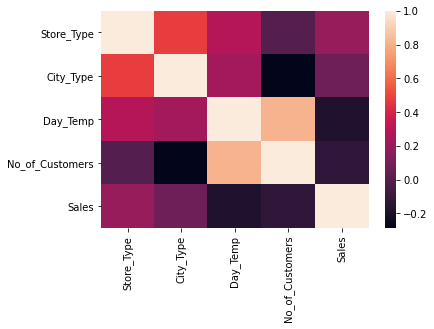

In [44]:
sns.heatmap(df_saless.corr())